In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
def F(theta1,theta2):#Modème directe
    X=[l1*np.cos(theta1)+l2*np.cos(theta1+theta2),l1*np.sin(theta1)+l2*np.sin(theta1+theta2)]
    return X
def fun(x):#fontion de résidus
    return [l1*np.cos(x[0])  + l2*np.cos(x[0]+x[1])-P[0],
            l1*np.sin(x[0])  + l2*np.sin(x[0]+x[1])-P[1]]
def jac(x):#jacobien de résidus
    return np.array([[-l1*np.sin(x[0])-l2*np.sin(x[0]+x[1]),
                      -l2*np.sin(x[0]+x[1])],
                     [l1*np.cos(x[0])+l2*np.cos(x[0]+x[1]),
                      l2*np.cos(x[0]+x[1])]])
def f(x):#carre_norme_residus
    return (l1*np.cos(x[0])  + l2*np.cos(x[0]+x[1])-P[0])**2+(l1*np.sin(x[0])  + l2*np.sin(x[0]+x[1])-P[1])**2
def j(theta1,theta2):#jaobien de carre_norme_residus
    r1=2*(l1*np.cos(theta1)+l2*np.cos(theta1+theta2)-P[0])*(-l1*np.sin(theta1)-l2*np.sin(theta1+theta2))+2*(l1*np.sin(theta1)+l2*np.sin(theta1+theta2)-P[1])*(l1*np.cos(theta1)+l2*np.cos(theta1+theta2))
    r2=2*(l1*np.cos(theta1)+l2*np.cos(theta1+theta2)-P[0])*(-l2*np.sin(theta1+theta2))+2*(l1*np.sin(theta1)+l2*np.sin(theta1+theta2)-P[1])*(l2*np.cos(theta1+theta2))
    return r1,r2
def H(theta1,theta2):#Hessian de carre_norme_residus
    h1=2*P[0]*(l1*np.cos(theta1)+l2*np.cos(theta1+theta2))+ 2*P[1]*(l1*np.sin(theta1)+l2*np.sin(theta1+theta2))
    h2=2*P[0]*l2*np.cos(theta1+theta2)+2*P[1]*l2*np.sin(theta1+theta2)
    h3=2*P[0]*l2*np.cos(theta1+theta2)+2*P[1]*l2*np.sin(theta1+theta2)
    h4=2*(l1*np.cos(theta1)-P[0])*(-l2*np.cos(theta1+theta2))+ 2*(l1*np.sin(theta1)-P[1])*(-l2*np.sin(theta1+theta2))
    return h1,h2,h3,h4
def Newton(theta,precision,nmax) :#méthode newton avec trois vrriables(theta:le point départ choisi,précision:la précision d'arret, nmax:le nombre max d'itération)
    global r1,r2,h1,h2,h3,h4
    theta1=theta[0]
    theta2=theta[1]
    tab_theta1=[theta1]#comme méthode gradient, on cree deux list, ils seront utulisés dans la fontion résultat_iteration_newton qui permet de s'afficher le résultat d'itetation pour un point départ choisi dans la graphe 
    tab_theta2=[theta2]
    h1,h2,h3,h4=H(theta1,theta2)
    r1,r2=j(theta1,theta2)
    dX=1#initialisation 
    n=0
    while dX >= precision and n <= nmax : 
        delta_theta1=(r2*h2-r1*h4)/(h1*h4-h2*h3)#calculer le delta_theta par la formule H_residus(theta1,theta2)*delta_theta=-J_résidus(theta1,theta2)
        delta_theta2=(r2*h1-r1*h3)/(h2*h3-h1*h4)
        theta1+=delta_theta1#renouvellement de theta1 et theta2
        theta2+=delta_theta2
        tab_theta1.append(theta1)
        tab_theta2.append(theta2)
        h1,h2,h3,h4=H(theta1,theta2)#renoubellement de la matrice hessian et jacobien
        r1,r2=j(theta1,theta2)
        dX=np.sqrt((delta_theta1)**2+(delta_theta2)**2)#renouvellement de dX
        n += 1
        
    return [theta1,theta2],tab_theta1,tab_theta2


la methode de newton avec la précision choisi---> 0.01 et le nombre d'itération max---> 10000

veuillez patienter, les donneés en train de chargement

les résultats résolu par methode newton en ces 400 points:

theta----->
 [[0.0, 1.570796], [0.0, 1.570796], [0.0, 1.570796], [0.0, 1.570796], [0.0, 1.570796], [0.0, 1.570796], [0.0, 1.570796], [0.0, 1.570796], [1.176005, 4.712389], [1.176005, 4.712389], [1.176005, 4.712389], [1.176005, 4.712389], [1.176005, 4.712389], [1.176005, 4.712389], [1.176005, 4.712389], [1.176005, 4.712389], [1.176005, 4.712389], [1.176005, 4.712389], [1.176005, 4.712389], [1.176005, 4.712389], [6.283185, 1.570797], [6.283185, 1.570797], [6.283185, 1.570797], [6.283185, 1.570797], [0.0, 1.570797], [0.0, 1.570797], [0.0, 1.570797], [0.0, 1.570797], [6.283185, 1.570796], [6.283185, 1.570796], [6.283185, 1.570796], [6.283185, 1.570796], [6.283185, 1.570796], [1.176006, 4.712389], [6.283185, 1.570798], [6.283185, 1.570798], [6.283185, 1.570798], [1e-06, 1.570796], [1

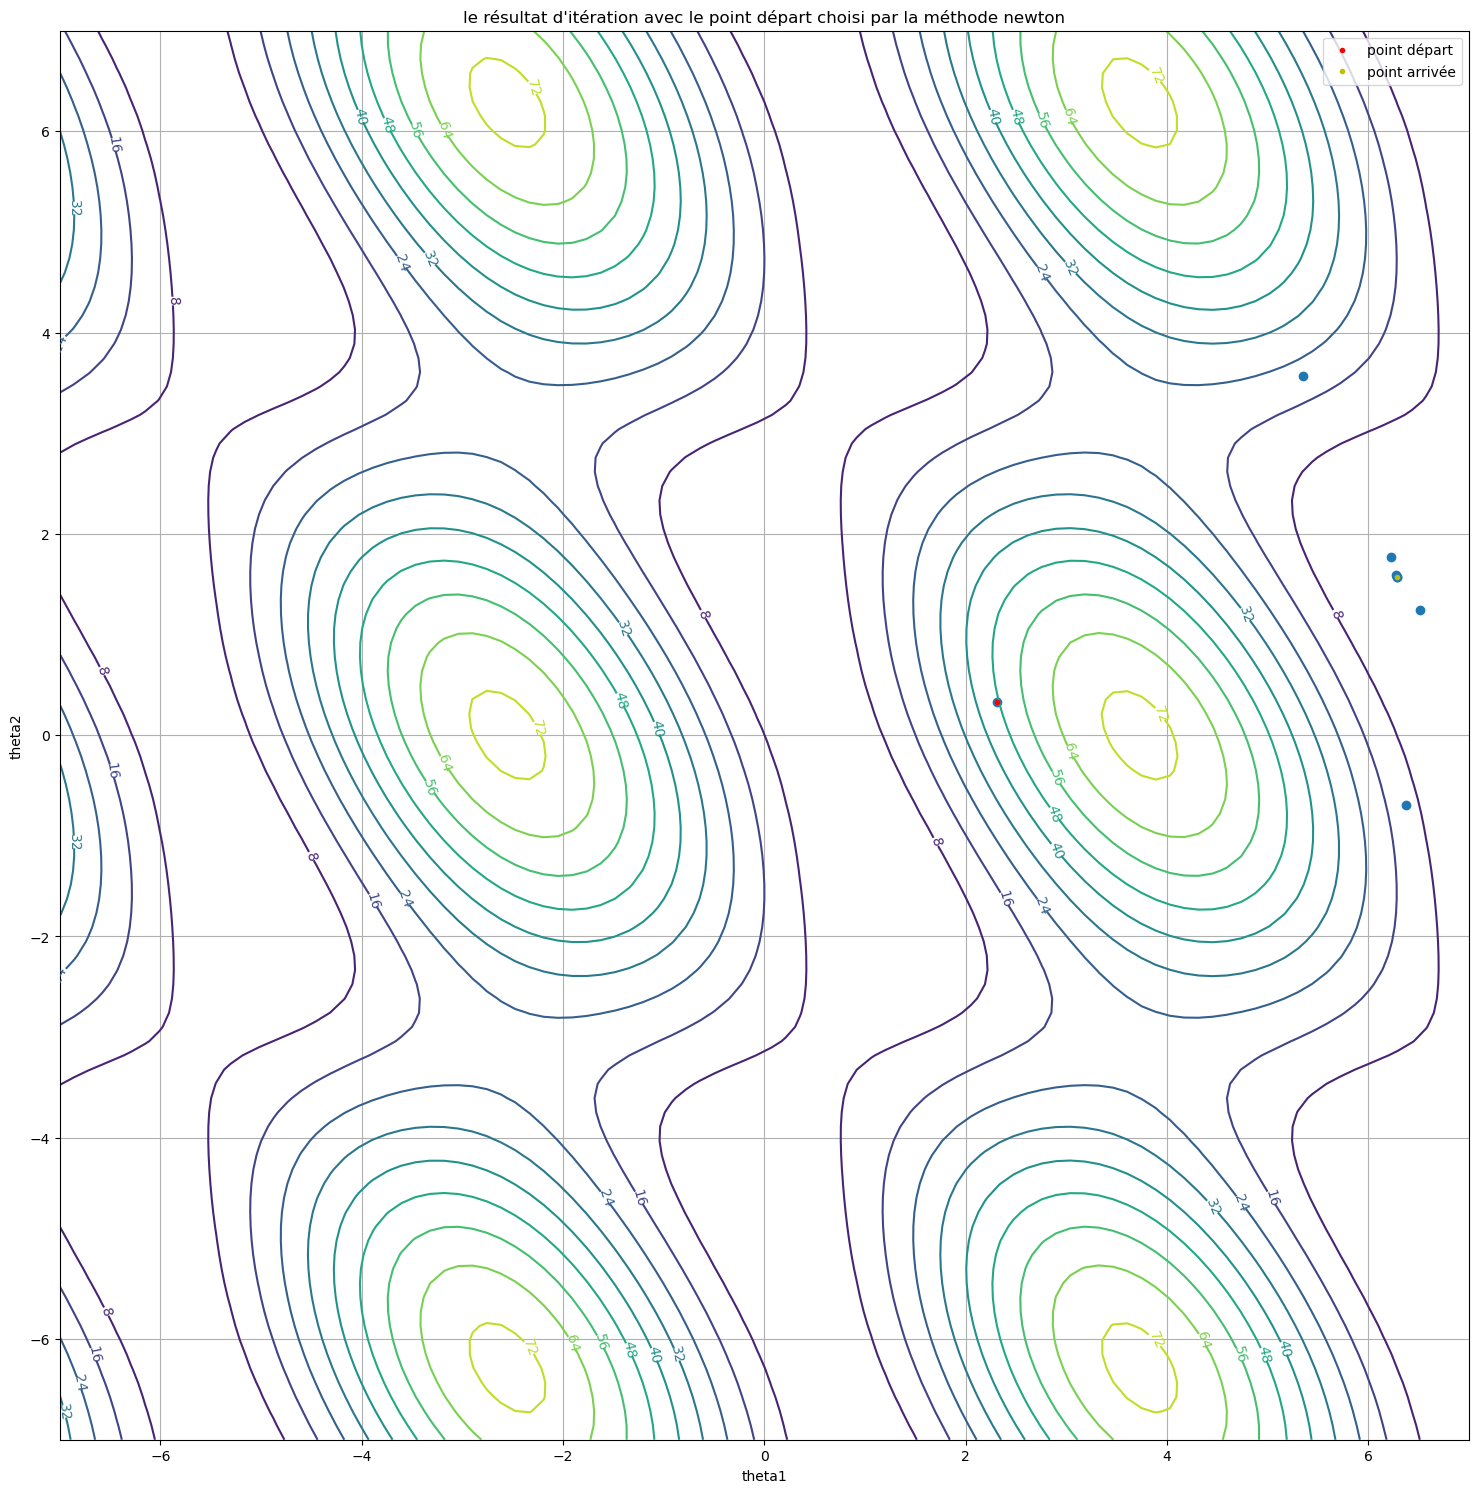

deuxieme solution nous donne---> point depart( [0.0, 4.960409453036515] )---> [1.176005, 4.712389]   vérification par modèle geometrique---> [3.000000429278913, 1.9999994149274292]


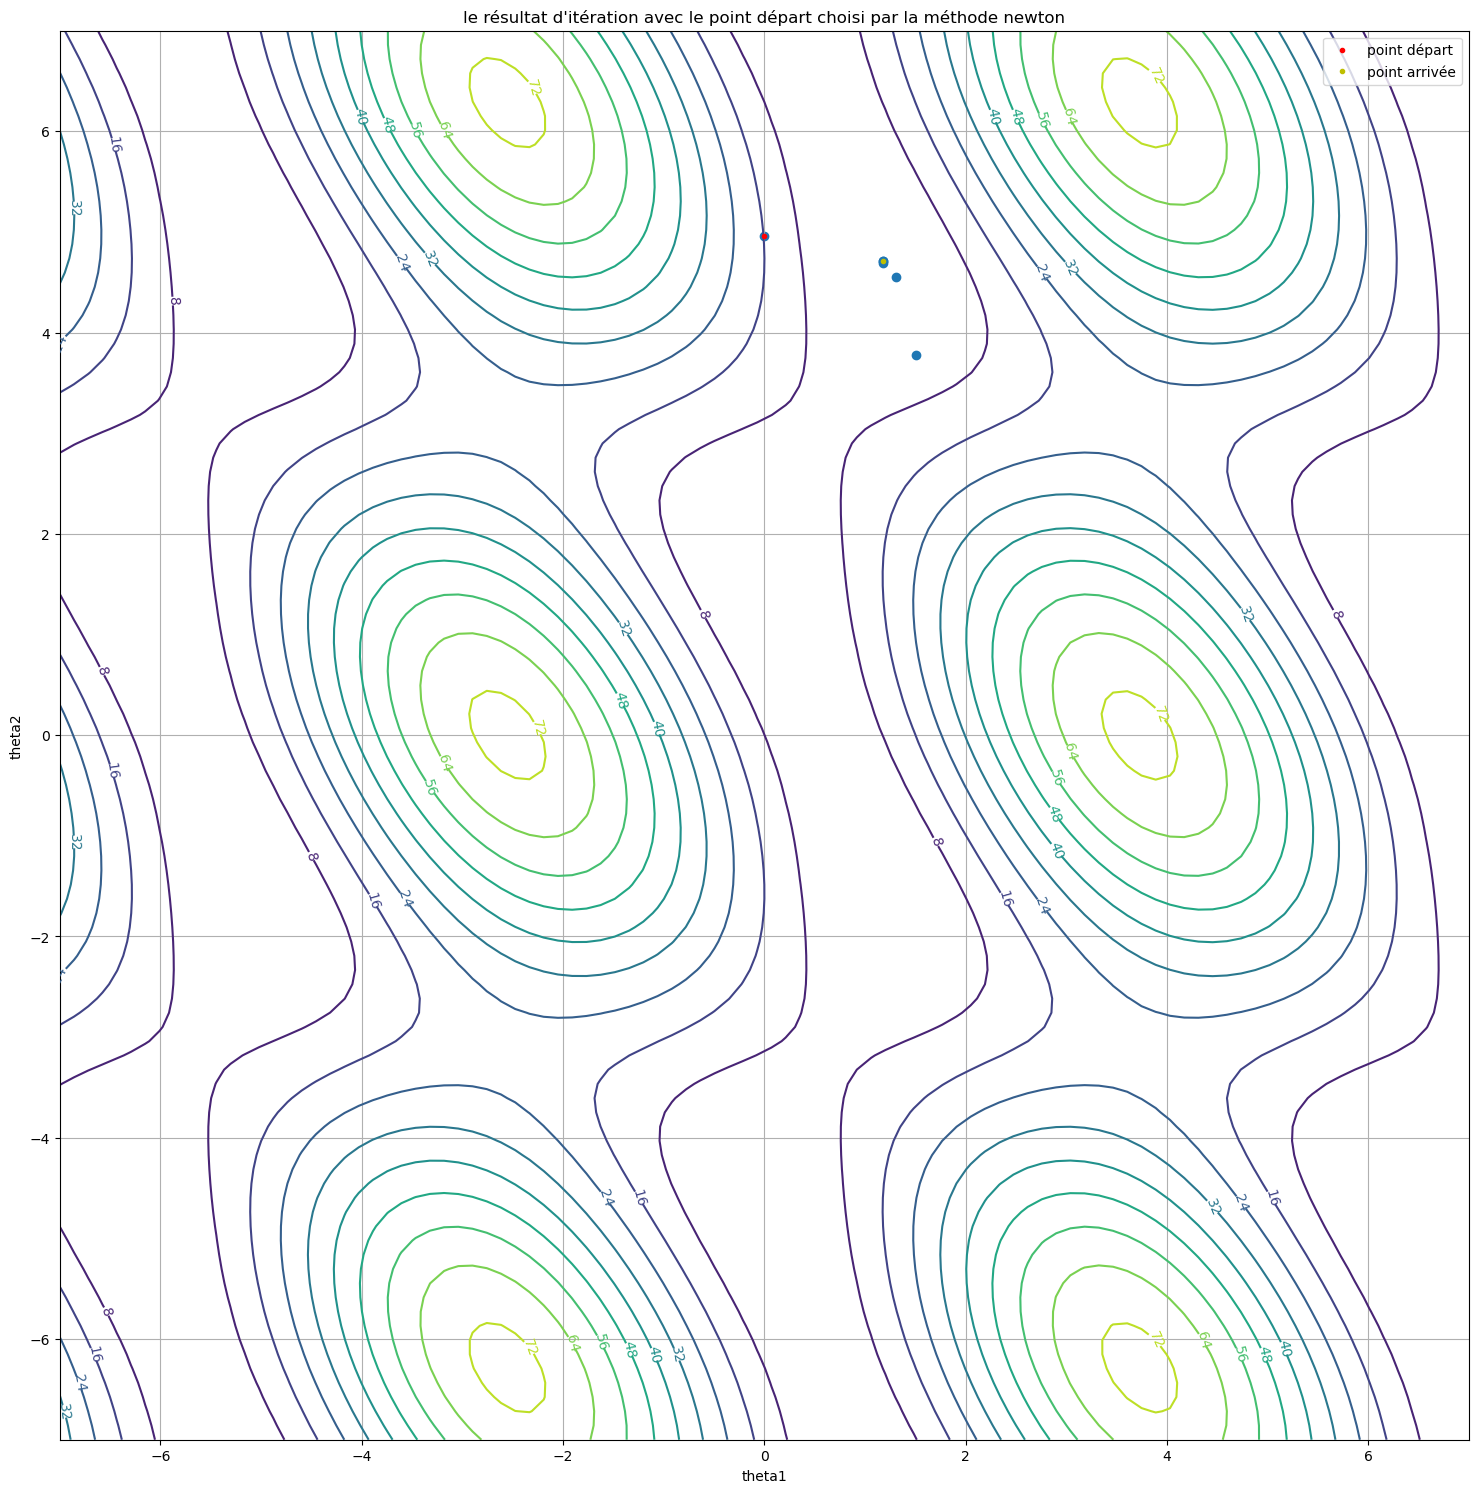

In [35]:
def résultat_iteration_newton(X,l,theta,precision,nmax):#cette fonction est pour tracer le resultat d'iteration de la methode newton dans le graphe 
    global P
    global l1,l2
    l1=l[0]
    l2=l[1]
    P=[X[0],X[1]]
    theta1min, theta1max, ntheta1 = -7, 7, 100   
    theta2min, theta2max, ntheta2 = -7, 7, 100
    theta1d = np.linspace(theta1min,theta1max,ntheta1)
    theta2d = np.linspace(theta2min,theta2max,ntheta2)
    Theta1d, Theta2d = np.meshgrid(theta1d, theta2d) #créer la maillage 
    nIso = 10
    plt.figure(figsize=(40, 40))
    plt.subplot(121)
    cp = plt.contour(Theta1d,Theta2d,f([Theta1d,Theta2d]),nIso)#tracer le graphe de isovaleur pour la fontion résidus
    plt.clabel(cp, inline=True,fontsize=10)
    plt.title("le résultat d'itération avec le point départ choisi par la méthode newton")
    plt.xlabel('theta1')
    plt.ylabel('theta2')
    plt.grid()
    plt.axis('square')
    plt.scatter(Newton(theta,precision,nmax)[1],Newton(theta,precision,nmax)[2])#tracer le résultat d'itération de la méthode newton 
    plt.plot(Newton(theta,precision,nmax)[1][0],Newton(theta,precision,nmax)[2][0],'.r',label="point départ") # Départ
    plt.plot(Newton(theta,precision,nmax)[1][-1],Newton(theta,precision,nmax)[2][-1],'.y',label="point arrivée") # Arrivée
    plt.legend()
    plt.show()
def solution_articulaire_4eme(X,l,precision,nmax):
    #définir les varriables glaobaux
    global P#la pose donné
    global l1,l2#les longuers des deux bras
    global Precision#le précision de la méthode newton
    global Nmax
    Precision=precision#choix de la précion 
    Nmax=nmax#choix du nombre max d'itération 
    l1=l[0]
    l2=l[1]
    P=[X[0],X[1]]
    theta1=[]
    theta2=[]
    A=[]#les list A et B, on va le rempli avec theta1 filtré et theta2 filtré apres le filtrage des resultat
    B=[]
    indice=[]
    theta=[]#le list theta va etre rempli par [theta1,theta2] apres les filtrages des résutats
    F_theta=[]#pour chaque solition trouvé([theta1,theta2]), on va calculer sa valeur f([theta1,theta2])(résidus), et on les met dans le list F_theta, ils seront utilisé dans critière de filtrage suivante
    valeur_bool1=True# les valeurs boolennes, ils seront utilsées pour distinguer le cas pas de solution ou unique solution ou deux solution 
    valeur_bool2=True
    indice_point_depart=0
    #les point départ différent qui va etre testé pour trouver les solutions possibles, ici on choisi 400 points
    point_depart=np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.3306939635357677, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.6613879270715354, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 0.992081890607303, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.3227758541430708, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.6534698176788385, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 1.984163781214606, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.3148577447503738, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.6455517082861415, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 2.9762456718219092, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.306939635357677, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.6376335988934447, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 3.968327562429212, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.29902152596498, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.6297154895007475, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 4.960409453036515, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.291103416572283, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.621797380108051, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 5.9524913436438185, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586]
    ,[0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586, 0.0, 0.3306939635357677, 0.6613879270715354, 0.992081890607303, 1.3227758541430708, 1.6534698176788385, 1.984163781214606, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.968327562429212, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586]])
        
    #première filtrage des résultat
    print("la methode de newton avec la précision choisi--->",Precision,"et le nombre d'itération max--->",Nmax)
    print("\nveuillez patienter, les donneés en train de chargement")
    if l2<l1:valeur_bool1=False
    if l2>=l1:valeur_boo1=True
    for i in range(len(point_depart[0])):
        sol = Newton([point_depart[0][i],point_depart[1][i]],Precision,Nmax)[0]#pour chaque point départ, on le test avec la méthode de newton
        a=float('%.6f'%(sol[0]%6.283185))#on met les résultat de root en format de float et avec une précision du calcul de 1e-6 et on applique la minisation des valeur articumaire aussi
        b=float('%.6f'%(sol[1]%6.283185))
        indice.append([indice_point_depart])#on ajoute la indice point départ des résultat qui passe le filtrage dans le list indice, il sera utilisé pour touver la point départ d'une solition a la fin 
        indice_point_depart+=1
        theta.append([a,b])
        F_theta.append(np.sqrt(f([a,b])))
    for i in range (len(F_theta)-1):#Nous trions les résultats finaux du plus petit au plus grand, puis prenons les deux plus petits
        for j in range (len(F_theta)-1-i):
            if F_theta[j]>F_theta[j+1]:
                F_theta[j],F_theta[j+1]=F_theta[j+1],F_theta[j]
                theta[j],theta[j+1]=theta[j+1],theta[j]
                indice[j],indice[j+1]=indice[j+1],indice[j]
    print("\nles résultats résolu par methode newton en ces 400 points:\n\ntheta----->\n",theta,"\n\nditance possibles----->\n",F_theta)
    #print(indice)
    if F_theta[0]>=1e-4:
        print("\nle cas pas de solution,le point le plus proche:","point depart(",[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],")   --->theta:",theta[0],"\net la distance le plus court:",F_theta[0])
        résultat_iteration_newton(X,l,[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],Precision,Nmax)
    elif valeur_bool1==True and (P[0]**2+P[1]**2)==(l1+l2)**2:
        print("\nle cas unique solution,","point depart(",[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],")   --->theta:",theta[0],"\nvérification par modele geometrique:",F(theta[0][0],theta[0][1]))
        résultat_iteration_newton(X,l,[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],Precision,Nmax)
    elif valeur_bool1==False and ((P[0]**2+P[1]**2)==(l1+l2)**2 or (P[0]**2+P[1]**2)==(l1-l2)**2):
        print("\nle cas unique solution,","point depart(",[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],")   --->theta:",theta[0],"\nvérification par modele geometrique:",F(theta[0][0],theta[0][1]))
        résultat_iteration_newton(X,l,[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],Precision,Nmax)
    else:
        for i in range(len(A)):#si theta1 theta2 sont égale deux pi ou moins deux pi, il est équibalent a la angle articulaire zéro
            if abs(theta[i][0]-6.28)<0.1 or abs(theta[i][0]+6.28)<0.1 or abs(theta[i][0])<0.1:
                theta[i][0]=0
            elif abs(theta[i][1]-6.28)<0.1 or abs(theta[i][1]+6.28)<0.1 or abs(theta[i][1])<0.1:
                theta[i][1]=0
        i=0
        j=1
        while i<len(theta):#on essaie de enlever les valeur équivalents 
            while j<len(theta):
                if abs(theta[i][0]-theta[j][0])<0.1 and abs(theta[i][1]-theta[j][1])<0.1:
                    theta.pop(j)
                    F_theta.pop(j)
                    indice.pop(j)
                else:
                    j+=1 
            i+=1
            j=i+1 
        print("\napres de le filtrage des valeurs équivalents---->\n",theta)
        for i in range(len(theta)-2):
                theta.pop(2)
                F_theta.pop(2)
                indice.pop(2)
        print("\nles solutions posisbles trouvées--->",theta,"\n")
        print("solution non_uniques!")
        print("premiere solution nous donne--->","point depart(",[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],")--->",theta[0],"  vérification par modèle geometrique--->",F(theta[0][0],theta[0][1]))
        résultat_iteration_newton(X,l,[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],Precision,Nmax)
        print("deuxieme solution nous donne--->","point depart(",[float(point_depart[0][indice[1]]),float(point_depart[1][indice[1]])],")--->",theta[1],"  vérification par modèle geometrique--->",F(theta[1][0],theta[1][1]))
        résultat_iteration_newton(X,l,[float(point_depart[0][indice[1]]),float(point_depart[1][indice[1]])],Precision,Nmax)
        
    return 
        
        
        
        
solution_articulaire_4eme([3,2],[3,2],1e-2,10000) 

In [ ]:
    if F_theta
        #définition de la premiere filtrage:pour l1>l2:abs(np.sqrt((F(a,b)[0])**2+(F(a,b)[1])**2)+np.sqrt(abs(sol.fun))-np.sqrt(X[0]**2+X[1]**2))=0
        #pour l1<l2:abs(np.sqrt((F(a,b)[0])**2+(F(a,b)[1])**2)-np.sqrt(abs(sol.fun))-np.sqrt(X[0]**2+X[1]**2))
        if abs(np.sqrt((F(a,b)[0])**2+(F(a,b)[1])**2)+np.sqrt(abs(f([a,b])))-np.sqrt(X[0]**2+X[1]**2))<= 0.00001 or abs(np.sqrt((F(a,b)[0])**2+(F(a,b)[1])**2)-np.sqrt(abs(f([a,b])))-np.sqrt(X[0]**2+X[1]**2))<= 0.00001 :
            A.append(a)#on ajoute le resultat qui passe le filtrage dans les list A et B
            B.append(b)
            indice.append([indice_point_depart])#on ajoute la indice point départ des résultat qui passe le filtrage dans le list indice, il sera utilisé pour touver la point départ d'une solition a la fin 
            indice_point_depart+=1
        else:
            indice_point_depart+=1
            
    print("\nles résultats résolu par methode newton en ces 400 points:\ntheta1----->\n",theta1,"\ntheta2----->\n",theta2)
    print("\nEt puis on doit filtrer ces résultat,enlever les résultats équivalents")
    for i in range(len(A)):#si theta1 theta2 sont égale deux pi ou moins deux pi, il est équibalent a la angle articulaire zéro
        if abs(A[i]-6.28)<0.1 or abs(A[i]+6.28)<0.1 or abs(A[i])<0.1:
            A[i]=0
        elif abs(B[i]-6.28)<0.1 or abs(B[i]+6.28)<0.1 or abs(B[i])<0.1:
            B[i]=0
    print("\npremière filtrage des résultat:\ntheta1----->\n",A,"\ntheta2----->\n",B)# termination de la premiere filtrage 
    # deuxièmre filtrage des résultat        
    i=0
    j=1
    while i<len(A):#on essaie de enlever les valeur équivalents 
        while j<len(A):
            if abs(A[i]-A[j])<0.1 and abs(B[i]-B[j])<0.1:
                A.pop(j)
                B.pop(j)
                indice.pop(j)
            else:
                j+=1 
        i+=1
        j=i+1
    print("\ndeuxième filtrage des résultat:\ntheta1----->\n",A,"\ntheta2----->\n",B)#termination de la deuxième filtrage
    
    for i in range(len(A)):#on ajoute les valeur resté dans le list theta et les valeur de f([theta1,theta2]) de chaque solution dans le list F_theta
        theta.append([A[i],B[i]])
    for i in range (len(theta)):
        F_theta.append(np.sqrt(f(theta[i])))
    for i in range (len(F_theta)-1):#Nous trions les résultats finaux du plus petit au plus grand, puis prenons les deux plus petits
        for j in range (len(F_theta)-1-i):
            if F_theta[j]>F_theta[j+1]:
                F_theta[j],F_theta[j+1]=F_theta[j+1],F_theta[j]
                theta[j],theta[j+1]=theta[j+1],theta[j]
                indice[j],indice[j+1]=indice[j+1],indice[j]
                
             
    print("\n\n----------------------------------------------------------------------------------------------------------")
    print("\nsolution possible trouvée par les points départ différents:",theta,"\n\nla distace possible trouvée par les points départ différents:",F_theta)
    
    if F_theta[0]>3e-1:#si la plus petite valeur de f([theta1,theta2]) est supérieur a 0.1, on peut dire il y pas de solution
            valeur_bool1=False             
    if valeur_bool1==False:#si on est dans le cas pas de solution, on peut la valeur la plus petite de racine(f) comme la distance le plus court
        print("\nle cas pas de solution,le point le plus proche:","point depart(",[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],")   --->theta:",theta[0],"\net la distance le plus court:",np.sqrt(F_theta[0]))   
        print("\net puis on trace les résultat d'itération en point départ--->",float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]]))
        résultat_iteration_newton(X,l,[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],Precision,Nmax)#on trace le résultat d'itération dans la graphe
        
    else:
        #si la nombre des solutions trouvées est supérieur a deux, on prends les deux plus petits, on enlève les restes
        if len(theta)>2:
            for i in range(len(theta)-2):
                theta.pop(2)
                F_theta.pop(2)
                indice.pop(2)
        #si finalment on a deux solutions trouvées, on va distinguer le cas unique solution ou deux solutions en comparent les grandeur, on utilise la fontion log10 pour le réaliser , c'est tres pratique pour comparer le gradeur
        #Normalement, s'il y a deux solutions, les grandeurs des deux ne sont pas très différentes. Si la différence de grandeur entre les deux est trop grande, nous supprimerons la deuxième solution    
        print("\n",abs(np.log10(F_theta[0])-np.log10(F_theta[1])),"\n") 
        if abs(np.log10(F_theta[0])-np.log10(F_theta[1]))>0.35:
            theta.pop(1)
            F_theta.pop(1)
            indice.pop(1)
        if len(theta)==1:
            valeur_bool2=False
        #solution unique 
        if valeur_bool1==True and valeur_bool2==False:
            print("solution unique: ","point depart(",[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],")   --->theta:",theta[0],"vérification par modème directe:",F(theta[0][0],theta[0][1]))
            print("\net puis on trace les résultat d'itération en point départ--->",float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]]))
            résultat_iteration_newton(X,l,[float(point_depart[0][indice[0]]),float(point_depart[1][indice[0]])],Precision,Nmax)#on trace le résultat d'itération dans la graphe
        #deux solutions
        elif valeur_bool1==True and valeur_bool2==True:
            print(abs(np.log10(F_theta[0])-np.log10(F_theta[1])))
            print("deux solutions possiblees",theta)
            print("vérification par modèle directe:")
            for i in range(len(theta)):
                print("point depart(",[float(point_depart[0][indice[i]]),float(point_depart[1][indice[i]])],")   --->theta:",theta[i],"--->vérification par modème directe:",F(theta[i][0],theta[i][1]))
                print("\net puis on trace les résultat d'itération en point départ--->",float(point_depart[0][indice[i]]),float(point_depart[1][indice[i]]))
                résultat_iteration_newton(X,l,[float(point_depart[0][indice[i]]),float(point_depart[1][indice[i]])],Precision,Nmax)  #on trace le résultat d'itération dans la graphe pour les deux points départ 
    return 

solution_articulaire_4eme([1,3],[1,4],1e-6,10000)  